How many numbers of groups you want to find? K-[Number of groups]

1. Random initial K-points, these are called centroids
2. Calculate distance of each pt w.r.t centroids, Assign group nearest to which ever centroid. [euclidean method]
3. Cordinate of Average of all the points, with in each group [if 2 axes x,y : av all x, av all y] -> new centroids
4. Repeat stpe 2 & 3 untill your centroids stops moving.

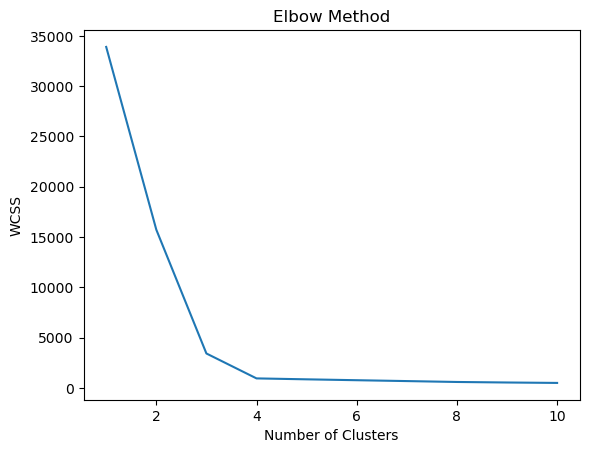

/Users/h/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/h/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/h/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/h/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/h/opt/anaconda3/l

Optimal number of clusters for K-Means: 4


/Users/h/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Generate synthetic data
X, _ = make_blobs(n_samples=500, centers=4, random_state=42)

# K-Means clustering
# Determine optimal number of clusters using elbow method
wcss = []
for i in range(1, 11): #[1,2,3,4,5,6,7,8,9,10]
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Determine optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    score = silhouette_score(X, preds)
    silhouette_scores.append(score)
optimal_k = np.argmax(silhouette_scores) + 2
print(f"Optimal number of clusters for K-Means: {optimal_k}")

$$s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$$

where $i$ is a data point, $a(i)$ is the average distance between $i$ and all other data points in the same cluster, and $b(i)$ is the smallest average distance between $i$ and all data points in a different cluster. The silhouette score for a whole clustering is the mean of the silhouette scores for all data points.

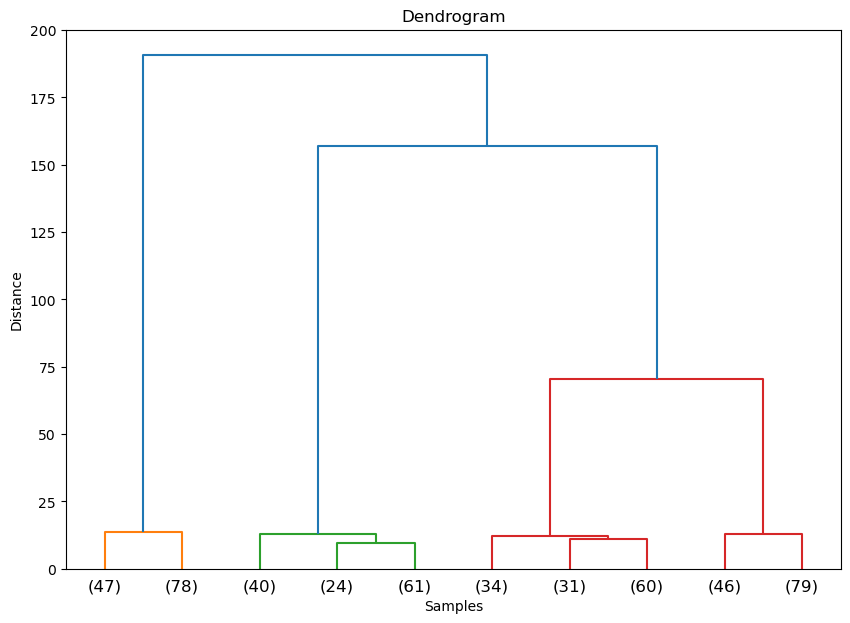

Optimal number of clusters for hierarchical clustering: 4


In [2]:
# Hierarchical clustering
# Determine optimal number of clusters using dendrogram
linked = linkage(X, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Determine optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    cluster_labels = fcluster(linked, n_clusters, criterion='maxclust')
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)
optimal_k = np.argmax(silhouette_scores) + 2
print(f"Optimal number of clusters for hierarchical clustering: {optimal_k}")